**Introduction**

This project is centered around implementing an **ETL (Extract, Transform, Load) process in Python** to meticulously prepare our dataset for comprehensive analysis. In the competitive landscape of business, understanding performance metrics is indispensable. It provides deep insights into market trends, effective strategies for customer acquisition, and identification of potential growth opportunities.

Our primary focus will be analyzing the performance of an eCommerce platform. We aim to delve into crucial aspects such as customer growth, product quality, and the efficiency of different payment methods. This analysis is essential to understand the strengths and weaknesses of the platform and to strategize for future enhancements.

**Step 1: ETL Process**
The ETL process is the backbone of our data preparation. Here’s what it entails:
- **Extraction**: Our first step involves pulling data from various sources, ensuring we have a comprehensive dataset to work with.
- **Transformation**: This phase is critical as it involves cleaning the dataset to remove inconsistencies, correcting formats of variables, and handling missing or duplicate data. We also merge data from different sources to create a unified dataset that provides a holistic view of all the information.
- **Loading**: After the data is cleaned and structured, we load it into a database or a suitable format for analysis. This step ensures that our data is stored securely and is accessible for further analysis.

**Step 2: Visualization with PowerBI**
Once our data is ready, we proceed to the visualization stage using PowerBI. This tool allows us to create dynamic and interactive dashboards that:
- Display key performance indicators (KPIs) vividly.
- Allow stakeholders to interact with the data, drilling down into metrics that matter the most.
- Provide actionable insights through visual representations, aiding in strategic decision-making.

In the upcoming sections, we will explore the technical details of our ETL process, followed by a showcase of our PowerBI dashboard that highlights the performance metrics of the eCommerce platform.


**Data source**

The data originates from the following location: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data

This dataset pertains to Brazilian ecommerce, specifically orders placed at the Olist Store. It comprises information on 100,000 orders spanning from 2016 to 2018, originating from various marketplaces across Brazil. The dataset encompasses a wide array of features, enabling a comprehensive view of each order from different perspectives. These include order status, pricing details, payment and shipping performance, customer location, product attributes, and customer reviews. Additionally, we have provided a geolocation dataset that correlates Brazilian zip codes with corresponding latitude and longitude coordinates.

This is real commercial data, it has been anonymised.

**Data Relationship**


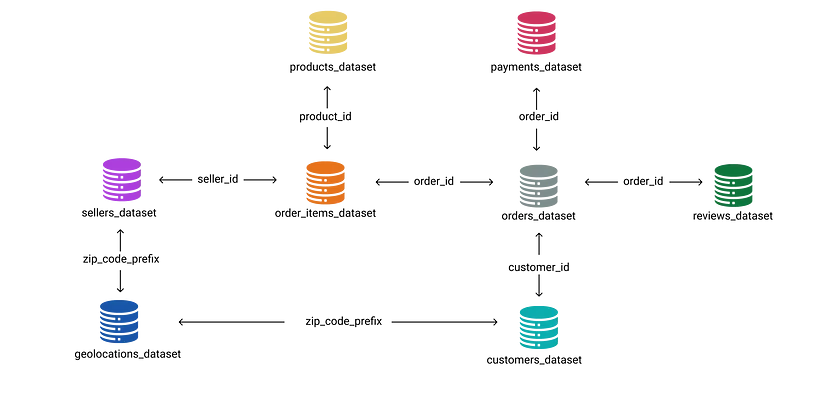

In [11]:
from IPython.display import Image, display

Image(filename="C:/Users/moyha/Desktop/ProjetUniv/image1.png")

# Extract


The extraction **(Extract)** step in an ETL process involves retrieving data from various sources such as databases, **flat files**, or **APIs**. In this case, it entails extracting data from different datasets in **CSV format**.

First, we need to install all the **libraries** that we need:


In [50]:
import pandas as pd
import sqlite3
import datetime

In [51]:
path = 'C:/Users/moyha/Desktop/ProjetUniv/Data/'

In [52]:
customers = pd.read_csv(path + 'customers_dataset.csv') 
geolocations = pd.read_csv(path + 'geolocation_dataset.csv')
order_items = pd.read_csv(path + 'order_items_dataset.csv') 
payments = pd.read_csv(path + 'order_payments_dataset.csv') 
order_reviews = pd.read_csv(path + 'order_reviews_dataset.csv')
Orders = pd.read_csv(path + 'orders_dataset.csv') 
products = pd.read_csv(path + 'products_dataset.csv') 
sellers = pd.read_csv(path + 'sellers_dataset.csv') 
categories =  pd.read_csv(path + 'product_category_name_translation.csv') 

# Tansform

After the extraction phase, the data undergoes transformation. In this step, the extracted data is cleaned, formatted, and restructured to suit the desired analysis or storage format.

This may involve tasks such as data cleaning, validation, normalization, and aggregation.


The transformation process ensures that the data is consistent, accurate, and ready for further analysis or loading into a data warehouse.


First, we will perform a brief check on our datasets, examining their types, presence of null values, and identification of duplicate values.

In [53]:
# List of table names
tables = ['customers', 'geolocations', 'order_items', 'payments', 
          'order_reviews', 'orders', 'products', 'sellers', 'categories']

# Function to perform checks for each table
def check_dataset(dataset):
    # Display the name of the table
    print("#Choice the dataset :", dataset)
    
    # Check the data types in the dataset
    print(f'The datatypes for each column are:\n{dataset.dtypes}')
    
    # Check the number of null entries in the dataset
    null_values = dataset.isnull().sum()
    print(f'The number of null values in each column are:\n{null_values}')
    
    # Check the number of duplicate entries in the dataset
    duplicate_entries = dataset.duplicated().sum()
    print(f'The number of duplicate entries in the dataset are:\n{duplicate_entries}')

# Loop for each table in the list
for table in tables:
    # Load the corresponding dataset
    dataset = globals().get(table)
    if dataset is None:
        print(f"The dataset for the table '{table}' has not been found.")
    else:
        # Call the function to perform the checks
        check_dataset(dataset)



#Choice the dataset :                             customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_cit

The number of duplicate entries in the dataset are:
0
#Choice the dataset :                               review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   


## Business Oriented Data Analysis

We will conduct an analysis to determine the number of sales over all periods in our data and check if we need to eliminate any periods from our study.

In [55]:
# Convertir la colonne 'order_purchase_timestamp' en datetime
Orders['order_purchase_timestamp'] = pd.to_datetime(Orders['order_purchase_timestamp'])

# Extraire l'année et le mois au format "YYYY MM"
Orders['YEAR'] = Orders['order_purchase_timestamp'].dt.strftime('%Y %m')



# Compter le nombre de commandes par mois et par année
SalePerYear = Orders.groupby('YEAR').size().reset_index(name='NumOfOrders')

# Trier les résultats par année et mois
SalePerYear = SalePerYear.sort_values('YEAR')

# Afficher les résultats
print(SalePerYear)


       YEAR  NumOfOrders
0   2016 09            4
1   2016 10          324
2   2016 12            1
3   2017 01          800
4   2017 02         1780
5   2017 03         2682
6   2017 04         2404
7   2017 05         3700
8   2017 06         3245
9   2017 07         4026
10  2017 08         4331
11  2017 09         4285
12  2017 10         4631
13  2017 11         7544
14  2017 12         5673
15  2018 01         7269
16  2018 02         6728
17  2018 03         7211
18  2018 04         6939
19  2018 05         6873
20  2018 06         6167
21  2018 07         6292
22  2018 08         6512
23  2018 09           16
24  2018 10            4


We can see there are so small Order in 09-12/2016 and 09-10/2018 and the data in 11/2016 is missing, so we need to clean these months out of this database and it won't effect the result



In [56]:

# Exclude records for the specified months
exclude_months = ["2016 09", "2016 10", "2016 12", "2018 09", "2018 10"]
Orders_filtered = Orders[~Orders['YEAR'].isin(exclude_months)]

# Compter le nombre de commandes par mois et par année
SalePerYear = Orders_filtered.groupby('YEAR').size().reset_index(name='NumOfOrders')

# Trier les résultats par année et mois
SalePerYear = SalePerYear.sort_values('YEAR')

# Afficher les résultats
print(SalePerYear)


       YEAR  NumOfOrders
0   2017 01          800
1   2017 02         1780
2   2017 03         2682
3   2017 04         2404
4   2017 05         3700
5   2017 06         3245
6   2017 07         4026
7   2017 08         4331
8   2017 09         4285
9   2017 10         4631
10  2017 11         7544
11  2017 12         5673
12  2018 01         7269
13  2018 02         6728
14  2018 03         7211
15  2018 04         6939
16  2018 05         6873
17  2018 06         6167
18  2018 07         6292
19  2018 08         6512


## Data Cleaning and Preparation

After examining types, null elements, duplicates, and possibly other irregularities, there are several types of modifications that we might consider to ensure the data is clean and ready for analysis:

### Handling Missing Data

- **Imputation**: Fill in missing values using the mean, median, mode, or a calculated value based on other data points. This is often used for numerical data.
- **Deletion**: Remove rows or columns with missing data, especially if the missing data is substantial and cannot be accurately imputed.
- **Flagging**: Create a new variable to indicate whether the data was missing for a particular observation, which can be useful in analysis.

### Correcting Data Types

- Ensure that each column in your dataset is of the correct data type (e.g., numbers are recognized as numeric types, dates as datetime types).

### Removing Duplicates

- Identify and remove duplicate entries to prevent skewing your data analysis. This can be done by defining what constitutes a unique entry in your context.

### Standardizing Values

- Standardize formats across data points, such as converting all dates to a single format, or ensuring text is uniformly capitalized or lowercased.

### Normalizing Data

- Scale numeric data from different units or scales to a standard scale, like 0-1 scaling or z-score normalization.

### Error Correction

- Manually or programmatically correct errors in data entries, such as typos or mislabeled categories.

### Outlier Detection and Handling

- Identify outliers and decide whether to remove them or adjust them, depending on their cause and your analysis needs.

### Encoding Categorical Data

- Convert categorical data into numerical data through methods like one-hot encoding or label encoding, necessary for many types of statistical modeling.

### Data Integration

- If multiple sources of data are being merged, ensure that the integration respects data integrity and resolves conflicts in data definitions and values.

### Structural Changes

- Modify the structure of the data by pivoting

## Specific Modifications for Our Case

For our case, here are the modifications to be made:

- For the `order_items` table, we will convert the `shippinglimit_date` variable to Date format.
- For the `review` table, we will keep only the ratings from 1 to 5 and delete the two columns `review_comment_title` and `review_comment_message` since they contain missing values. Our focus in this study is on KPIs rather than sentiment analysis.
- Similarly, for the `orders` table, we will convert the format of the following columns to Date format:
  - `order_purchase_timestamp`
  - `order_approved_at`
  - `order_delivered_carrier_date`
  - `order_delivered_customer_date`
  - `order_estimated_delivery_date`

  We will also add a column that calculates the difference between `order_delivered_customer_date` and `order_estimated_delivery_date` to include it in our KPIs.
- For the `products` table, we can replace observations without a product category with "Others" and replace the product category names in this table with the category names from the category table, but in English. Additionally, we will delete the following columns since this information is not useful for our KPIs:
  - `product_name_length`
  - `product_description_length`
  - `product_photos_qty`
  - `product_weight_g`
  - `product_length_cm`
  - `product_height_cm`
  - `product_width_cm`
  
product category names might contain underscores ('_') instead of spaces (' '). This can happen due to various reasons such as data entry errors, system exports, or formatting inconsistencies. For better readability and consistency in our analysis, we need to clean this aspect of our dataset by replacing underscores with spaces in the product category names.

In [57]:
# Mettre la première lettre en majuscule pour les colonnes spécifiées dans sellers et customers 
sellers['seller_city'] = sellers['seller_city'].str.title()
sellers['seller_state'] = sellers['seller_state'].str.title()

customers['customer_city'] = customers['customer_city'].str.title()
customers['customer_state'] = customers['customer_state'].str.title()


In [58]:
# Convert shippinglimit_date to Date format in order_items table 
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])
# Convert price payment value to to float 
payments['payment_value'] = payments['payment_value'].astype(float)



In [59]:
# Keep only ratings from 1 to 5 and drop review_comment_title and review_comment_message columns in review table
order_reviews = order_reviews[order_reviews['review_score'].between(1, 5)]
order_reviews.drop(['review_comment_title', 'review_comment_message'], axis=1, inplace=True)

In [60]:
# Convert date columns to Date format and add a column for delivery time difference in orders table
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_columns:
    Orders_filtered[col] = pd.to_datetime(Orders_filtered[col])

Orders_filtered['delivery_time_difference'] = (Orders_filtered['order_estimated_delivery_date'] - Orders_filtered['order_delivered_customer_date']).dt.days
Orders_filtered['delivery_time_difference'].fillna(0, inplace=True)

# Remplacer les valeurs infinies par une valeur par défaut (par exemple, 0)
Orders_filtered['delivery_time_difference'].replace([np.inf, -np.inf], 0, inplace=True)

# Convertir la colonne 'delivery_time_difference' en nombre entier
Orders_filtered['delivery_time_difference'] = Orders_filtered['delivery_time_difference'].astype(int)


C:\Users\moyha\AppData\Local\Temp\ipykernel_13816\4232648562.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Orders_filtered[col] = pd.to_datetime(Orders_filtered[col])
C:\Users\moyha\AppData\Local\Temp\ipykernel_13816\4232648562.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Orders_filtered[col] = pd.to_datetime(Orders_filtered[col])
C:\Users\moyha\AppData\Local\Temp\ipykernel_13816\4232648562.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [61]:
#  merge with categories table to get English category names 
products = products.merge(categories, how='left', on='product_category_name')
# Drop unnecessary columns in products table
products.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
               'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm','product_category_name',], axis=1, inplace=True)

# Rename the column
products.rename(columns={'product_category_name_english': 'product_category_name'}, inplace=True)
# Replace observations without a product category with "Others" 
products['product_category_name'].fillna('Others', inplace=True)
# Replace '_' in the product category name with ' '

products['product_category_name'] = products['product_category_name'].str.replace('_', ' ').str.title()



## Merge these datasets into a single table

To do this, we need to determine how to merge them. Each dataset seems to be related to e-commerce orders, but each of them contains different information about these **orders**.

Here are some ideas on how we could merge these data:

- **Orders and Customers**: We can merge the datasets containing information about customers (customer_id, customer_unique_id, etc.) with the one containing information about orders (order_id, order_status, etc.). We will use customer_id or customer_unique_id as the merge key.

- **Orders and Products**: We can also merge the datasets containing information about orders with the one containing information about products (product_id, product_category_name, etc.). We will use product_id as the merge key.

- **Orders and Payments**: Merge the data on orders with the one on payments (payment_type, payment_installments, etc.). We will use order_id as the merge key.

- **Orders and Reviews**: Merge the data on orders with the one on reviews (review_score, review_comment_message, etc.). We will use order_id as the merge key.

- **Orders and Sellers**: Finally, we can merge the data on orders with the one on sellers (seller_id, seller_city, etc.). We will use seller_id as the merge key.


In [62]:
# Merge data on orders with data on customers
merged_df = pd.merge(Orders_filtered, customers, on='customer_id')

# Merge with data on products
merged_df = pd.merge(merged_df, order_reviews, on='order_id')

# Merge with data on payments
merged_df = pd.merge(merged_df, payments, on='order_id')

# Merge with data on reviews
merged_df = pd.merge(merged_df, order_items, on='order_id')

# Merge with data on products
merged_df = pd.merge(merged_df, products, on='product_id')

# Merge with data on sellers
merged_df = pd.merge(merged_df, sellers, on='seller_id')


## check the new merged dataset

now we need to check on our datasets, examining their types, presence of null values, and identification of duplicate values.


In [63]:

# Check the data types in the dataset
print(f'The datatypes for each column are:\n{merged_df.dtypes}')

# Check the number of null entries in the dataset
null_values = merged_df.isnull().sum()
print(f'The number of null values in each column are:\n{null_values}')

# Check the number of duplicate entries in the dataset
duplicate_entries = merged_df.duplicated().sum()
print(f'The number of duplicate entries in the dataset are:\n{duplicate_entries}')


The datatypes for each column are:
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
YEAR                                     object
delivery_time_difference                  int32
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
review_id                                object
review_score                              int64
review_creation_date                     object
review_answer_timestamp                  object
payment_sequential                        int64
payment_type                             object
payme

## Mapping

Now, we will create a mapping dictionary to simplify the visualization part of our dataset.


In [64]:
# Mapping for visualisation
column_mapping = {
    'order_id': 'Order ID',
    'customer_id': 'Customer ID',
    'order_status': 'Order Status',
    'order_purchase_timestamp': 'Purchase Timestamp',
    'order_approved_at': 'Approved Timestamp',
    'order_delivered_carrier_date': 'Carrier Delivery Date',
    'order_delivered_customer_date': 'Customer Delivery Date',
    'order_estimated_delivery_date': 'Estimated Delivery Date',
    'delivery_time_difference': 'Delivery Time Difference',
    'customer_unique_id': 'Unique Customer ID',
    'customer_zip_code_prefix': 'Customer Zip Code Prefix',
    'customer_city': 'Customer City',
    'customer_state': 'Customer State',
    'review_id': 'Review ID',
    'review_score': 'Review Score',
    'review_creation_date': 'Review Creation Date',
    'review_answer_timestamp': 'Review Answer Timestamp',
    'payment_sequential': 'Payment Sequential',
    'payment_type': 'Payment Type',
    'payment_installments': 'Payment Installments',
    'payment_value': 'Payment Value',
    'order_item_id': 'Order Item ID',
    'product_id': 'Product ID',
    'seller_id': 'Seller ID',
    'shipping_limit_date': 'Shipping Limit Date',
    'price': 'Price',
    'freight_value': 'Freight Value',
    'product_category_name': 'Product Category',
    'seller_zip_code_prefix': 'Seller Zip Code Prefix',
    'seller_city': 'Seller City',
    'seller_state': 'Seller State'
}

merged_df.rename(columns=column_mapping, inplace=True)


## check identical columns

In [65]:
all_identical = (merged_df.apply(lambda col: col.nunique()) == 1).all()

if all_identical:
    print("All columns are identical to each other.")
else:
    print("There are differences between the columns.")


There are differences between the columns.


# load 

In the "load" section, we focus on importing and preparing our datasets for analysis. 
This step involves reading data from various sources, such as CSV files or databases, and then cleaning and transforming it to ensure consistency and usability. Data loading is crucial as it sets the foundation for subsequent data exploration, visualization, and modeling tasks. Typically, we handle tasks such as handling missing values, converting data types, and merging datasets to create a comprehensive view of the data. Once loaded and preprocessed, the data is ready for further analysis and insights extraction.


In [66]:
# Export to CSV
merged_df.to_csv('C:/Users/moyha/Desktop/ProjetUniv/merged1_data.csv', index=False)

# Data Visualisation

For this part, we will focus on visualizing our `merged_df` table, which contains all the cleaned and merged data from our previous tables. Below, you will find our dashboard in PowerBI. 

In [4]:
from IPython.display import IFrame

In [8]:
# Importer display et HTML depuis IPython.display
from IPython.display import display, HTML

# URL du tableau de bord Power BI sécurisé
url = "https://app.powerbi.com/reportEmbed?reportId=03283de4-b3eb-4eee-a034-e060c15d1078&autoAuth=true&ctid=144b6294-952d-4b86-87aa-aa8bf2979a47"

# Code HTML de l'iframe
html_code = f"""
<iframe title="DashboardfinalMAJ" width="1000" height="500" src="{url}" frameborder="0" allowFullScreen="true"></iframe>
"""

# Afficher le code HTML dans Jupyter Notebook
display(HTML(html_code))
